# - XGBoost 
## XGBoost Algorithm to predict Purchasing Power (PP) Value of a country
### Strategic Thinking CA2, CCT 2023
#### Thomas, Simone, Sam & Akash


In [1]:
#pip install xgboost

In [2]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

In [3]:
# Importing Data
data = pd.read_csv('dataset_final.csv')

In [4]:
# Creating X and y labels
X = data.drop(['Value', 'LOCATION'], axis=1)
y = np.log(data['Value'])

In [5]:
# Creating train/test split
## Test size is 20% 
## Random State is 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
# Encoding y training data as need this to work with XGBoost
le = LabelEncoder()
y_train = le.fit_transform(y_train)

### Creating Model with no optimisation or hyper-parameter tuning

In [7]:
# Defining XGB Regression Model 
model = xgb.XGBRegressor()

# Fitting training splits
model.fit(X_train.values, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [8]:
# Making Predictions
y_pred = model.predict(X_test)

print(y_pred)

[ 65.66343    73.63814    83.253525   77.119774   17.586561   47.56933
  15.620634   54.916576   17.979906   66.70728    67.55705    11.861186
  33.110584    6.0652013  65.54926    74.60678    36.459637   85.82189
  74.67745    59.364086   45.256115   55.906815   73.20502    37.0344
  23.774605   77.79207    85.07107    47.50464    67.023155   19.78632
  77.87696    88.541176   68.33563    79.481544   35.66552    75.21409
  72.178665   75.783966   18.212791   54.67594     6.504455   96.94139
  82.68782    21.768332   90.833954   64.43227    46.88126    60.13877
  99.24957    77.34566    41.982227   36.01253    37.46714    73.12148
  32.01758    74.618805   71.122696   18.77951    53.210056   82.11461
  81.94637    61.335297   45.052856   13.885744   16.03019    30.347563
  63.252213   56.076725   72.87045    29.393703   70.621994   41.051178
  95.38416    60.66056    98.42816   100.40866    57.654736   21.742632
  14.583373   81.58052    62.725025   42.370834   69.271576   62.55733
  6

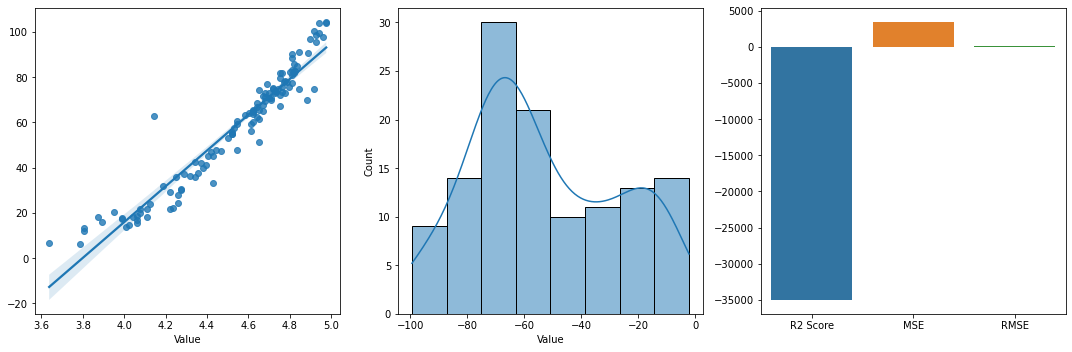

In [9]:
# Evaluating model R2 score, Mean-Squared Error and Root-mean-squared error
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# Visualising Evaluations
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15,5))
sns.regplot(x=y_test, y=y_pred, ax=axes[0])
sns.histplot(y_test-y_pred, ax=axes[1], kde=True)
sns.barplot(x=["R2 Score", "MSE", "RMSE"], y=[r2, mse, rmse], ax=axes[2])
plt.tight_layout()
plt.show()

In [10]:
# Printing Evaluations
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("R2 Score:", r2)
print("MSE:", mse)
print("RMSE:", rmse)

R2 Score: -35000.068091223606
MSE: 3483.6796580064497
RMSE: 59.02270459752289


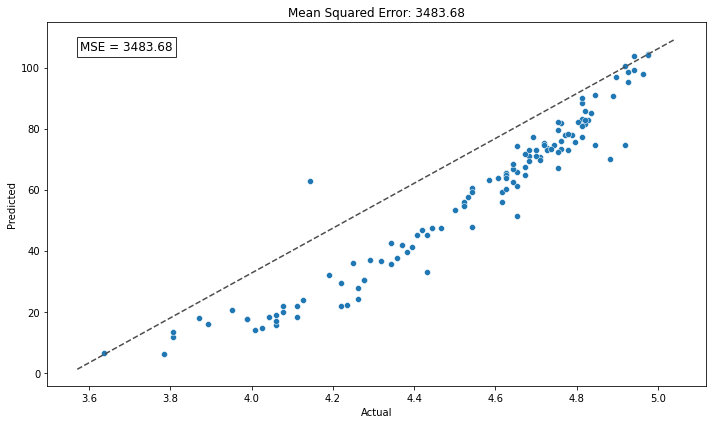

In [11]:
# Plotting larger graph for MSE
fig, ax = plt.subplots(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, ax=ax)
ax.plot(ax.get_xlim(), ax.get_ylim(), ls="--", c=".3")
ax.set_xlabel("Actual")
ax.set_ylabel("Predicted")
ax.set_title("Mean Squared Error: {:.2f}".format(mse))
ax.annotate("MSE = {:.2f}".format(mse), xy=(0.05, 0.95), xycoords='axes fraction',
            fontsize=12, ha='left', va='top', bbox=dict(boxstyle='square', facecolor='white', alpha=0.8))
plt.tight_layout()
plt.show()

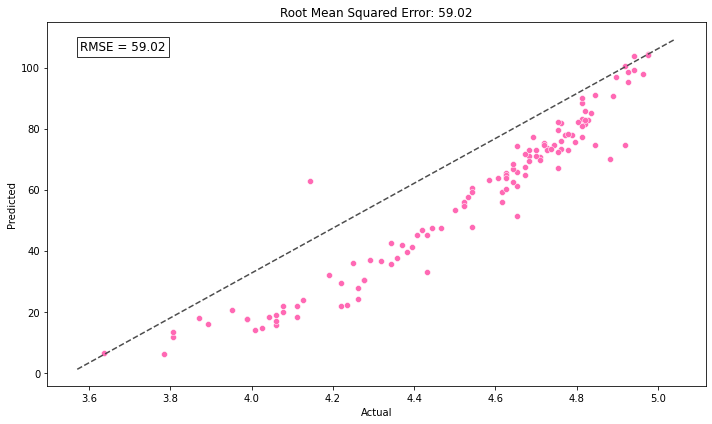

In [12]:
# Plotting larger graph for RMSE
fig, ax = plt.subplots(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, ax=ax, color="hotpink")
ax.plot(ax.get_xlim(), ax.get_ylim(), ls="--", c=".3")
ax.set_xlabel("Actual")
ax.set_ylabel("Predicted")
ax.set_title("Root Mean Squared Error: {:.2f}".format(rmse))
ax.annotate("RMSE = {:.2f}".format(rmse), xy=(0.05, 0.95), xycoords='axes fraction',
            fontsize=12, ha='left', va='top', bbox=dict(boxstyle='square', facecolor='white', alpha=0.8))
plt.tight_layout()
plt.show()

### Changing Training Split

In [13]:
# Creating train/test split
## Test size is 10% 
## Random State is 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Encoding y training data as need this to work with XGBoost
le = LabelEncoder()
y_train = le.fit_transform(y_train)

# Defining XGB Regression Model 
model = xgb.XGBRegressor()

# Fitting training splits
model.fit(X_train.values, y_train)

# Making Predictions
y_pred = model.predict(X_test)

# Printing Evaluations
r2_10 = r2_score(y_test, y_pred)
mse_10 = mean_squared_error(y_test, y_pred)
rmse_10 = np.sqrt(mse_10)
print("R2 Score:", r2)
print("MSE:", mse)
print("RMSE:", rmse)

R2 Score: -35000.068091223606
MSE: 3483.6796580064497
RMSE: 59.02270459752289


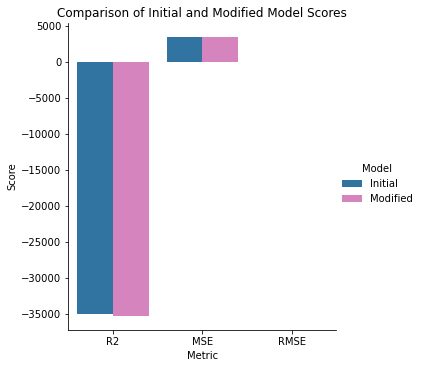

In [14]:
# Creating Visualisation comparing previous R2, MSE and RMSE to new scores
data_dict = {'Metric': ['R2', 'MSE', 'RMSE'], 'Initial': [r2, mse, rmse], 'Modified': [r2_10, mse_10, rmse_10]}
df_2 = pd.DataFrame(data_dict)
df_melted = pd.melt(df_2, id_vars='Metric', var_name='Model', value_name='Score')

sns.catplot(x='Metric', y='Score', hue='Model', data=df_melted, kind='bar', palette=['tab:blue', 'tab:pink'])
plt.title('Comparison of Initial and Modified Model Scores')
plt.show()

### Creating Model with hyper-parameter tuning - GridSearchCV

In [49]:
data = pd.read_csv('dataset_final.csv')

X = data.drop(['Value', 'LOCATION'], axis=1)
y = np.log(data['Value'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

le = LabelEncoder()
y_train = le.fit_transform(y_train)

# Define XGBoost model
model = xgb.XGBRegressor()

# Define hyperparameters for grid search
param_grid = {
    'learning_rate': [0.05, 0.1, 0.2],
    #'n_estimators': [100,300,600,1000],
    #'gamma': [0.1, 1, 2],
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.8, 0.9, 1],
    'colsample_bytree': [0.8, 0.9, 1]
}

In [50]:
# Using GridSearchCV with Cross Validation
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estim

In [51]:
# Getting best hyperparameters and fitting model
best_params = grid_search.best_params_
model = xgb.XGBRegressor(**best_params)
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=None, gpu_id=None,
             grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.2, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=3, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [52]:
y_pred = model.predict(X_test)

In [53]:
# Printing New Evaluations
r2_tuned = r2_score(y_test, y_pred)
mse_tuned = mean_squared_error(y_test, y_pred)
rmse_tuned = np.sqrt(mse_tuned)
print("R2 Score:", r2_tuned)
print("MSE:", mse_tuned)
print("RMSE:", rmse_tuned)

R2 Score: -34987.61445396444
MSE: 3465.3891078406095
RMSE: 58.867555646897806


In [54]:
print(best_params)

{'colsample_bytree': 1, 'learning_rate': 0.2, 'max_depth': 3, 'min_child_weight': 3, 'subsample': 0.9}


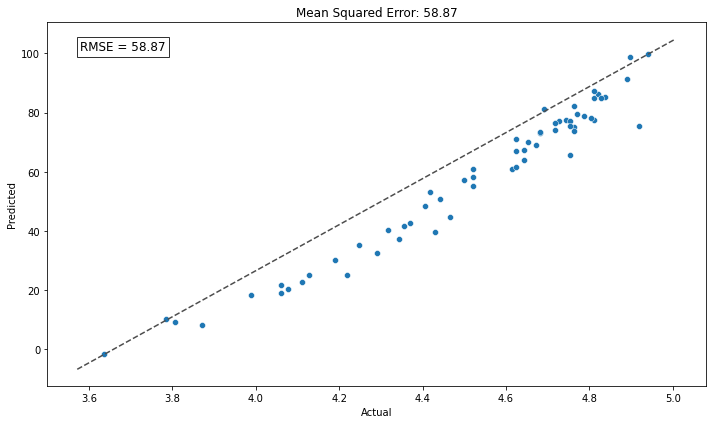

In [20]:
# Plotting New RMSE Score
fig, ax = plt.subplots(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, ax=ax)
ax.plot(ax.get_xlim(), ax.get_ylim(), ls="--", c=".3")
ax.set_xlabel("Actual")
ax.set_ylabel("Predicted")
ax.set_title("Mean Squared Error: {:.2f}".format(rmse_tuned))
ax.annotate("RMSE = {:.2f}".format(rmse_tuned), xy=(0.05, 0.95), xycoords='axes fraction',
            fontsize=12, ha='left', va='top', bbox=dict(boxstyle='square', facecolor='white', alpha=0.8))
plt.tight_layout()
plt.show()

### L1 Regularisation

In [25]:
# L1 Regularisation
model = xgb.XGBRegressor(objective='reg:squarederror', alpha=0.1, **best_params)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [26]:
# Printing New Evaluations
r2_l1 = r2_score(y_test, y_pred)
mse_l1 = mean_squared_error(y_test, y_pred)
rmse_l1 = np.sqrt(mse_l1)
print("R2 Score:", r2_l1)
print("MSE:", mse_l1)
print("RMSE:", rmse_l1)

R2 Score: -34961.311094709185
MSE: 3462.783935384218
RMSE: 58.84542408194725


### L2 Regularisation

In [28]:
# L2 Regularisation 
model = xgb.XGBRegressor(objective='reg:squarederror', reg_lambda=0.1, **best_params)

model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

In [29]:
# Printing New Evaluations
r2_l2 = r2_score(y_test, y_pred)
mse_l2 = mean_squared_error(y_test, y_pred)
rmse_l2 = np.sqrt(mse_l2)
print("R2 Score:", r2_l2)
print("MSE:", mse_l2)
print("RMSE:", rmse_l2)

R2 Score: -34650.12444108919
MSE: 3431.96297099939
RMSE: 58.58295802534548


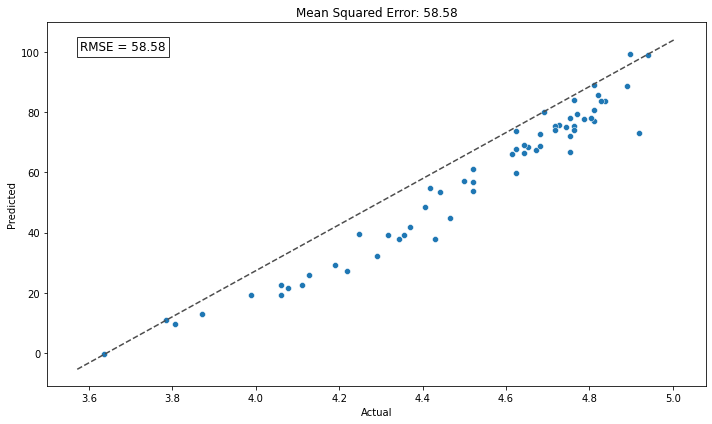

In [31]:
# Plotting New RMSE Score
fig, ax = plt.subplots(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, ax=ax)
ax.plot(ax.get_xlim(), ax.get_ylim(), ls="--", c=".3")
ax.set_xlabel("Actual")
ax.set_ylabel("Predicted")
ax.set_title("Mean Squared Error: {:.2f}".format(rmse_l2))
ax.annotate("RMSE = {:.2f}".format(rmse_l2), xy=(0.05, 0.95), xycoords='axes fraction',
            fontsize=12, ha='left', va='top', bbox=dict(boxstyle='square', facecolor='white', alpha=0.8))
plt.tight_layout()
plt.show()

### Comparing RMSE Scores

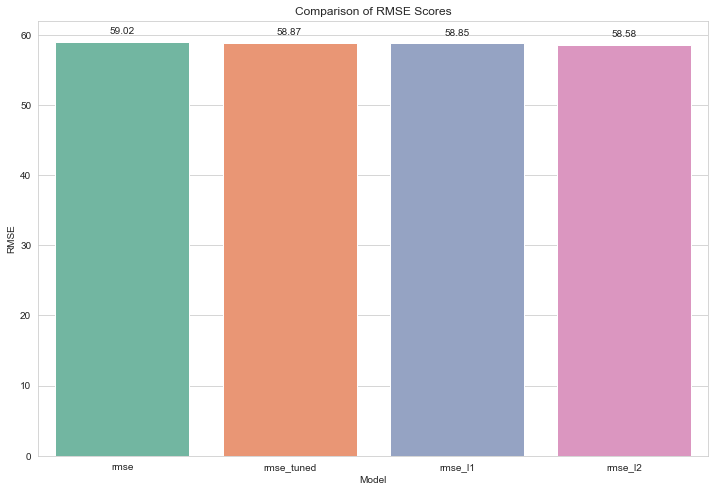

In [48]:
# Allocating RMSE scores into Dictionary
rmse_scores = {"rmse": rmse, "rmse_tuned": rmse_tuned, "rmse_l1": rmse_l1, "rmse_l2": rmse_l2}

# Converting Ditionary into DataFrame
df_rmse = pd.DataFrame.from_dict(rmse_scores, orient="index", columns=["RMSE"])
df_rmse = df_rmse.reset_index()
df_rmse = df_rmse.rename(columns={"index": "Model"})

# Creating visualisation
sns.set_style("whitegrid")

plt.figure(figsize=(12,8))

ax = sns.barplot(x="Model", y="RMSE", data=df_rmse, palette="Set2")

plt.title("Comparison of RMSE Scores")
plt.xlabel("Model")
plt.ylabel("RMSE")

for p in ax.patches:
    ax.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha="center", va="center", xytext=(0, 10), textcoords="offset points")

plt.show()

In [55]:
print(r2_l2)

-34650.12444108919
